In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
retail = pd.read_csv('Online retail.csv')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


**Data Attributes**
* **InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter **‘c’**, it indicates a cancellation.
* **StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* **Description:** Product (item) name. Nominal.
* **Quantity:** The quantities of each product (item) per transaction. Numeric.
* **InvoiceDate:** Invoice Date and time. Numeric, the day and time when each transaction was generated.
* **UnitPrice:** Unit price. Numeric, Product price per unit in sterling.
* **CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* **Country:** Country name. Nominal, the name of the country where each customer resides.

In [3]:
retail.shape

(541909, 8)

In [4]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
retail.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Basic Cleaning

#### Checking for duplicate values

In [6]:
retail.duplicated().sum()

5268

In [7]:
retail.drop_duplicates(inplace= True)

In [8]:
retail.shape

(536641, 8)

#### Removing negative quantity of Return orders

In [9]:
retail[retail['InvoiceNo'].str.startswith('C')==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,09-12-2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,09-12-2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,09-12-2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,09-12-2011 11:58,1.25,17315.0,United Kingdom


In [10]:
retail = retail[retail['InvoiceNo'].str.startswith('C')!=True]
retail.shape

(527390, 8)

#### keeping only those transaction having quantity more than 0

In [11]:
retail = retail[retail["Quantity"]>=0]
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [12]:
retail.shape

(526054, 8)

In [13]:
retail['CustomerID'].unique()

array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

In [14]:
retail["CustomerID"].nunique()

4339

In [15]:
print(retail.dtypes.value_counts())
print("\nint64",retail.select_dtypes("int64").columns)
print("\nfloat64",retail.select_dtypes("float64").columns)
print("\nobject",retail.select_dtypes("object").columns)

object     5
float64    2
int64      1
dtype: int64

int64 Index(['Quantity'], dtype='object')

float64 Index(['UnitPrice', 'CustomerID'], dtype='object')

object Index(['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country'], dtype='object')


In [16]:
retail["InvoiceDate"] = pd.to_datetime(retail["InvoiceDate"], format='%d-%m-%Y %H:%M')

In [17]:
print("minimum date :", min(retail["InvoiceDate"]))
print("maximium date :", max(retail["InvoiceDate"]))

minimum date : 2010-12-01 08:26:00
maximium date : 2011-12-09 12:50:00


#### Perform descriptive analytics on country

In [18]:
retail["Country"].value_counts(normalize=True)

United Kingdom          0.914627
Germany                 0.017160
France                  0.015955
EIRE                    0.014985
Spain                   0.004714
Netherlands             0.004492
Belgium                 0.003861
Switzerland             0.003724
Portugal                0.002836
Australia               0.002251
Norway                  0.002038
Italy                   0.001441
Channel Islands         0.001420
Finland                 0.001302
Cyprus                  0.001146
Sweden                  0.000855
Unspecified             0.000840
Austria                 0.000757
Denmark                 0.000722
Poland                  0.000627
Japan                   0.000610
Israel                  0.000555
Hong Kong               0.000532
Singapore               0.000422
Iceland                 0.000346
USA                     0.000340
Canada                  0.000287
Greece                  0.000276
Malta                   0.000213
United Arab Emirates    0.000129
European C

In [19]:
country = pd.DataFrame(retail['Country'].unique(), columns=["Country"])
country.index += 1
country

,Country
1,United Kingdom
2,France
3,Australia
4,Netherlands
5,Germany
6,Norway
7,EIRE
8,Switzerland
9,Spain
10,Poland


In [20]:
country_group = pd.DataFrame(retail.groupby(["Country"])['CustomerID'].nunique())
country_group.sort_values(by= "CustomerID", ascending= False, inplace = True)
country_group

,CustomerID
Country,
United Kingdom,3921
Germany,94
France,87
Spain,30
Belgium,25
Switzerland,21
Portugal,19
Italy,14
Finland,12


<Figure size 576x432 with 0 Axes>

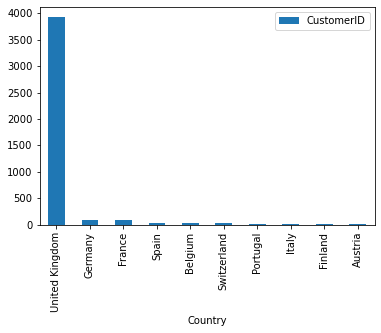

In [21]:
plt.figure(figsize=(8,6))
country_group.head(10).plot.bar()
plt.show()

In [22]:
retail["CustomerID"].nunique()

4339

In [23]:
retail["CustomerID"].isna().sum()

133322

In [24]:
retail[retail["CustomerID"].isna()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


In [25]:
retail.dropna(subset="CustomerID", inplace= True)

In [26]:
retail.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Customer order more than one item

In [27]:
order = retail.groupby(['CustomerID'])["InvoiceNo"].nunique()
order

CustomerID
12346.0     1
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     2
18283.0    16
18287.0     3
Name: InvoiceNo, Length: 4339, dtype: int64

In [28]:
order_per = np.sum(order>1)/retail['CustomerID'].nunique()
print(f'{100 * order_per:.2f}% of customers ordered more than one item.')

65.57% of customers ordered more than one item.


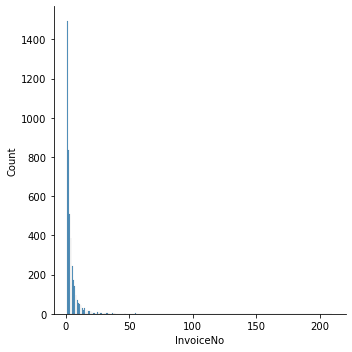

In [29]:
sns.displot(order)

**RFM Analysis** RFM (**Recency, Frequency, Monetary**) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

 * RECENCY (R): Days since last purchase
 * FREQUENCY (F): Total number of purchases
 * MONETARY VALUE (M): Total money this customer spent.

In [30]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Adding new attribute : Amount

In [31]:
retail["CustomerID"] = retail["CustomerID"].astype(str)

In [32]:
retail["Amount"] = retail["Quantity"] * retail["UnitPrice"]
rfm_a = retail.groupby("CustomerID")["Amount"].sum()
rfm_a = rfm_a.reset_index()
rfm_a.head()

,CustomerID,Amount
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


### Adding new attribute : Frequency

In [33]:
rfm_f= retail.groupby("CustomerID")['InvoiceNo'].nunique()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ["CustomerID", "Frequency"]
rfm_f.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [34]:
rfm = pd.merge(rfm_a, rfm_f, on = "CustomerID", how = "inner")
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,77183.60,1
1,12347.0,4310.00,7
2,12348.0,1797.24,4
3,12349.0,1757.55,1
4,12350.0,334.40,1


In [35]:
max_date = retail["InvoiceDate"].max()
max_date

Timestamp('2011-12-09 12:50:00')

In [36]:
retail["diff"] = max_date - retail["InvoiceDate"]
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


### last transaction date

In [37]:
rfm_r = retail.groupby("CustomerID")["diff"].min()
rfm_r = rfm_r.reset_index()
rfm_r.head()

,CustomerID,diff
0,12346.0,325 days 02:49:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


### Exact number of days

In [38]:
rfm_r["diff"] = rfm_r["diff"].dt.days
rfm_r.head()

,CustomerID,diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [39]:
rfm = pd.merge(rfm, rfm_r, on = "CustomerID", how = "inner")
rfm.columns = ["CustomerID", "Monetary", "Frequency", "Recency"]
rfm = rfm[["CustomerID","Recency", "Frequency", "Monetary"]]
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40


In [40]:
recency = pd.DataFrame(retail.groupby('CustomerID')['InvoiceDate'].max().reset_index())
recency['InvoiceDate'] = pd.to_datetime(recency['InvoiceDate']).dt.date
recency['MaxDate'] = recency['InvoiceDate'].max()
recency['recency'] = (recency['MaxDate'] - recency['InvoiceDate']).dt.days + 1
recency = recency[['CustomerID','recency']]
recency.head()

,CustomerID,recency
0,12346.0,326
1,12347.0,3
2,12348.0,76
3,12349.0,19
4,12350.0,311


In [41]:
quantiles = rfm[["Recency", "Frequency", "Monetary"]].quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,17.0,1.0,306.455
0.50,50.0,2.0,668.560
0.75,141.0,5.0,1660.315


In [42]:
quantiles.to_dict()

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 306.455, 0.5: 668.5600000000001, 0.75: 1660.315}}

In [43]:
# Assiging numbers to RFM values.
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
# Regency :  Lower the value, better the customer
def Rscore (x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
# Frequency and Monetary : Higher the value, better the customer

def FMscore (x,p,k):
    if x <= k[p][0.25]:
        return 1
    elif x <= k[p][0.5]:
        return 2
    elif x <= k[p][0.75]:
        return 3
    else:
        return 4

### Segementing the values of Recency, Frequency, and Monetary

In [44]:
rfm["R_score"] = rfm["Recency"].apply(Rscore, args = ("Recency", quantiles))
rfm["F_score"] = rfm["Frequency"].apply(FMscore, args = ("Frequency", quantiles))
rfm["M_score"] = rfm["Monetary"].apply(FMscore, args = ("Monetary", quantiles))
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score
0,12346.0,325,1,77183.60,1,1,4
1,12347.0,1,7,4310.00,4,4,4
2,12348.0,74,4,1797.24,2,3,4
3,12349.0,18,1,1757.55,3,1,4
4,12350.0,309,1,334.40,1,1,2


In [45]:
rfm["RFM_Score"] = rfm["R_score"].astype(str)+rfm["F_score"].astype(str)+rfm["M_score"].astype(str)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
0,12346.0,325,1,77183.60,1,1,4,114
1,12347.0,1,7,4310.00,4,4,4,444
2,12348.0,74,4,1797.24,2,3,4,234
3,12349.0,18,1,1757.55,3,1,4,314
4,12350.0,309,1,334.40,1,1,2,112


In [46]:
rfm[rfm["RFM_Score"]=="444"].sort_values("Monetary", ascending= False).head(10)

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
1690,14646.0,1,74,280206.02,4,4,4,444
4202,18102.0,0,60,259657.30,4,4,4,444
3729,17450.0,7,46,194390.79,4,4,4,444
1880,14911.0,0,201,143711.17,4,4,4,444
1334,14156.0,9,55,117210.08,4,4,4,444
3772,17511.0,2,31,91062.38,4,4,4,444
3177,16684.0,3,28,66653.56,4,4,4,444
1290,14096.0,3,17,65164.79,4,4,4,444
997,13694.0,3,50,65039.62,4,4,4,444
2177,15311.0,0,91,60632.75,4,4,4,444


### Customer analysis based on RFM Score

In [47]:
print("Best customers : ", len(rfm[rfm["RFM_Score"]=="444"]))
print("Big Spender Cusotmers : ", len(rfm[rfm["M_score"]==4]))
print("Loyal Cusotmers : ", len(rfm[rfm["F_score"]==4]))
print("Recent Customers : ", len(rfm[rfm["R_score"]==4]))
print("Can’t Lose Them : ", len(rfm[rfm["RFM_Score"]=="144"]))
print("lost customers : ", len(rfm[rfm["RFM_Score"]=="111"]))

Best customers :  461
Big Spender Cusotmers :  1085
Loyal Cusotmers :  872
Recent Customers :  1126
Can’t Lose Them :  10
lost customers :  440


### Clustering algorithm
**K-Means Clustering**

In [48]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
0,12346.0,325,1,77183.60,1,1,4,114
1,12347.0,1,7,4310.00,4,4,4,444
2,12348.0,74,4,1797.24,2,3,4,234
3,12349.0,18,1,1757.55,3,1,4,314
4,12350.0,309,1,334.40,1,1,2,112


In [49]:
rfm_df = rfm.copy()
rfm_df = rfm.iloc[:,:4]
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40


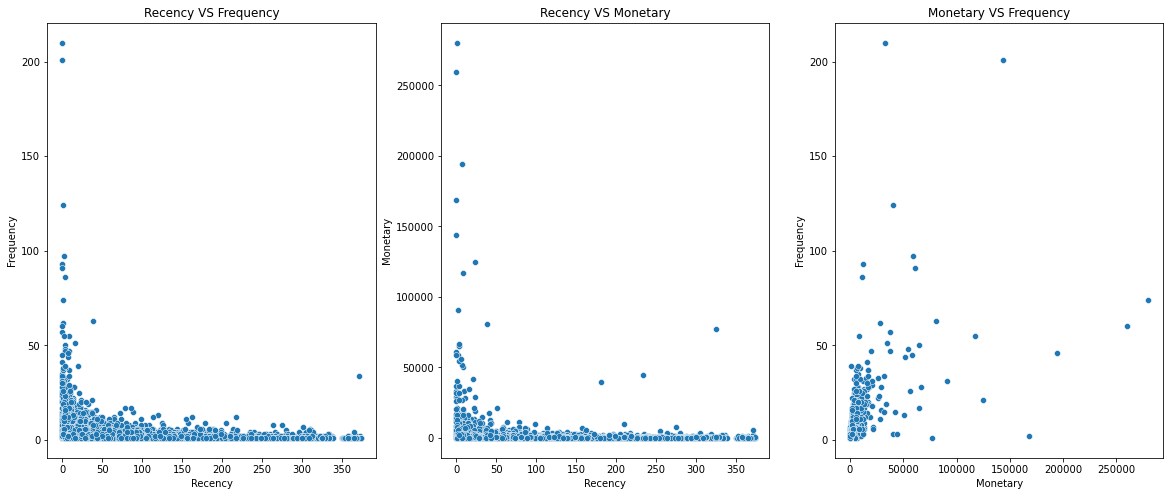

In [50]:
plt.figure(figsize = (20,8))
plt.subplot(1,3,1)
sns.scatterplot(x= "Recency", y = "Frequency", data = rfm_df)
plt.title("Recency VS Frequency")
plt.subplot(1,3,2)
sns.scatterplot(x= "Recency", y = "Monetary", data = rfm_df)
plt.title("Recency VS Monetary")
plt.subplot(1,3,3)
sns.scatterplot(x= "Monetary", y = "Frequency", data = rfm_df)
plt.title("Monetary VS Frequency")
plt.show()

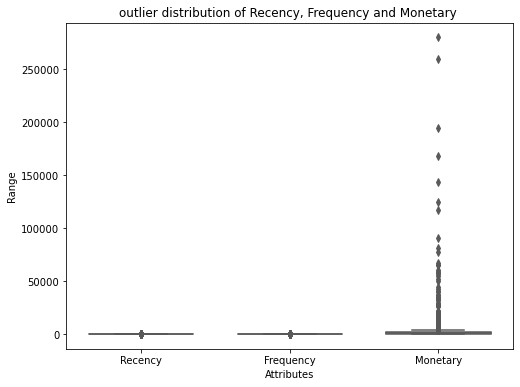

In [51]:
rfm_col = ["Recency", "Frequency", "Monetary"]
plt.figure(figsize= (8,6))
sns.boxplot(data = rfm[rfm_col], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("outlier distribution of Recency, Frequency and Monetary ")
plt.xlabel("Attributes")
plt.ylabel("Range")
plt.show()

### Removing outliers for RFM Table

In [52]:
# Removing outliers from Monetary
Q1 = rfm_df["Monetary"].quantile(0.05)
Q3 = rfm_df["Monetary"].quantile(0.95)
IQR = Q3 - Q1
rfm_df = rfm_df[(rfm_df["Monetary"]>= (Q1 - 1.5*IQR)) & (rfm_df["Monetary"]<= Q3 + 1.5*IQR)]
# Removing outliers from Recency
Q1 = rfm_df["Recency"].quantile(0.05)
Q3 = rfm_df["Recency"].quantile(0.95)
IQR = Q3 - Q1
rfm_df = rfm_df[(rfm_df["Recency"]>= (Q1 - 1.5*IQR)) & (rfm_df["Recency"]<= Q3 + 1.5*IQR)]
# Removing outliers from Frequency
Q1 = rfm_df["Frequency"].quantile(0.05)
Q3 = rfm_df["Frequency"].quantile(0.95)
IQR = Q3 - Q1
rfm_df = rfm_df[(rfm_df["Frequency"]>= (Q1 - 1.5*IQR)) & (rfm_df["Frequency"]<= Q3 + 1.5*IQR)]

In [53]:
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40
5,12352.0,35,8,2506.04


In [54]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
0,12346.0,325,1,77183.60,1,1,4,114
1,12347.0,1,7,4310.00,4,4,4,444
2,12348.0,74,4,1797.24,2,3,4,234
3,12349.0,18,1,1757.55,3,1,4,314
4,12350.0,309,1,334.40,1,1,2,112


In [55]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = rfm_df.iloc[:,1:]
cluster_ss = ss.fit_transform(x)

# converting cluster_ss into dataframe
cluster_ss = pd.DataFrame(cluster_ss)
cluster_ss.columns = ["Recency","Frequency","Monetary"]
cluster_ss.head()

,Recency,Frequency,Monetary
0,-0.917321,0.872418,1.666760
1,-0.187953,0.095375,0.268122
2,-0.747468,-0.681668,0.246030
3,2.160014,-0.681668,-0.546115
4,-0.577615,1.131432,0.662650


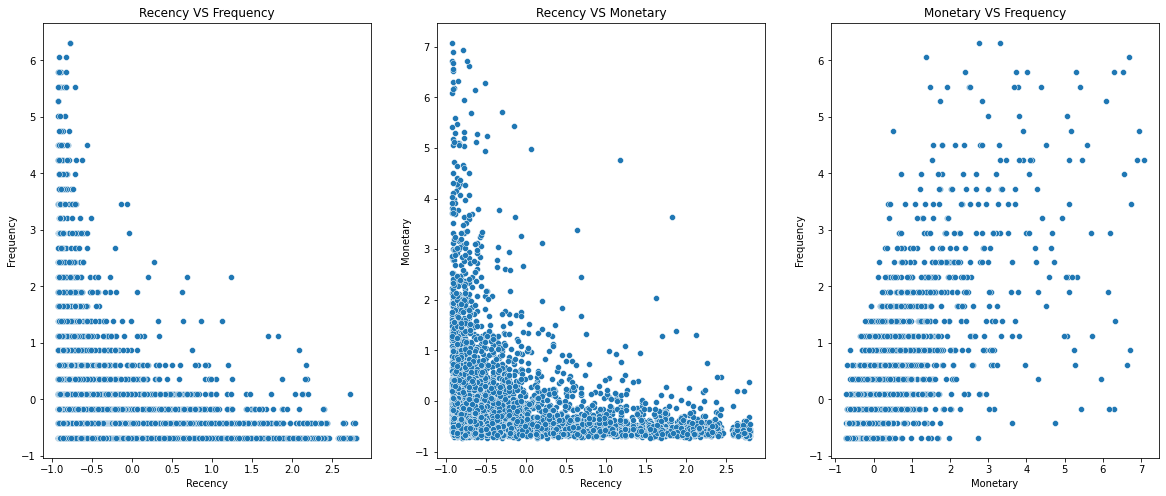

In [56]:
plt.figure(figsize = (20,8))
plt.subplot(1,3,1)
sns.scatterplot(x= "Recency", y = "Frequency", data = cluster_ss)
plt.title("Recency VS Frequency")
plt.subplot(1,3,2)
sns.scatterplot(x= "Recency", y = "Monetary", data = cluster_ss)
plt.title("Recency VS Monetary")
plt.subplot(1,3,3)
sns.scatterplot(x= "Monetary", y = "Frequency", data = cluster_ss)
plt.title("Monetary VS Frequency")
plt.show()

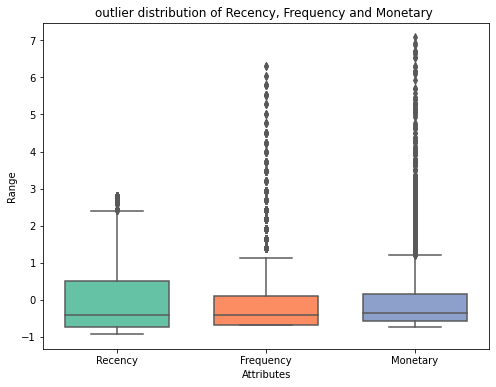

In [57]:
col = ["Recency", "Frequency", "Monetary"]
plt.figure(figsize= (8,6))
sns.boxplot(data = cluster_ss[col], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("outlier distribution of Recency, Frequency and Monetary ")
plt.xlabel("Attributes")
plt.ylabel("Range")
plt.show()

In [58]:
from sklearn.cluster import KMeans

In [59]:
wcss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, random_state = 0)
    kmeans.fit(cluster_ss)
    wcss.append(kmeans.inertia_)

wcss

[12783.000000000011,
 7430.557252007123,
 4180.157574604626,
 2970.236348875673,
 2511.9599635371796,
 2115.9132571791047,
 1837.478935842019,
 1635.0583640740458,
 1478.14723089871,
 1362.9292513675628]

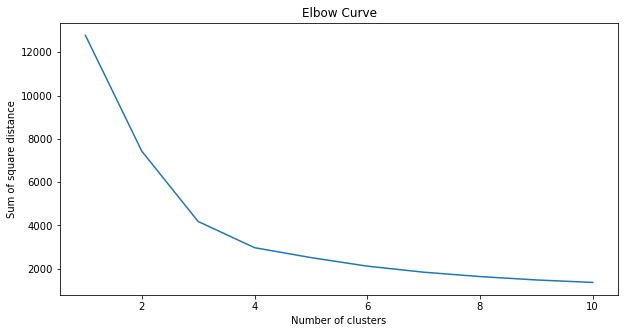

In [60]:
# ploting the elbow curve for wcss values
plt.figure(figsize = (10,5))
plt.plot(range(1,11), wcss)
plt.title("Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("Sum of square distance")
plt.show()

In [61]:
from sklearn.metrics import silhouette_score
for num_clusters in list(range(2,11)):
    # intialise kmeans
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(cluster_ss)
    
    cluster_labels = model_clus.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(cluster_ss, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5451140608636436
For n_clusters=3, the silhouette score is 0.510889172119373
For n_clusters=4, the silhouette score is 0.48543838094494884
For n_clusters=5, the silhouette score is 0.4416231379498921
For n_clusters=6, the silhouette score is 0.41775142164229906
For n_clusters=7, the silhouette score is 0.42155855279028653
For n_clusters=8, the silhouette score is 0.39028217333882154
For n_clusters=9, the silhouette score is 0.3844908840944487
For n_clusters=10, the silhouette score is 0.35050545225717633


In [62]:
kmeanmodel = KMeans(n_clusters = 3, max_iter= 50)
y_kmeans = kmeanmodel.fit(cluster_ss)
lbs =y_kmeans.labels_
print(lbs)

[1 0 0 ... 0 1 0]


In [63]:
rfm_df["Cluster_Id"] = lbs
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,Cluster_Id
1,12347.0,1,7,4310.00,1
2,12348.0,74,4,1797.24,0
3,12349.0,18,1,1757.55,0
4,12350.0,309,1,334.40,2
5,12352.0,35,8,2506.04,0


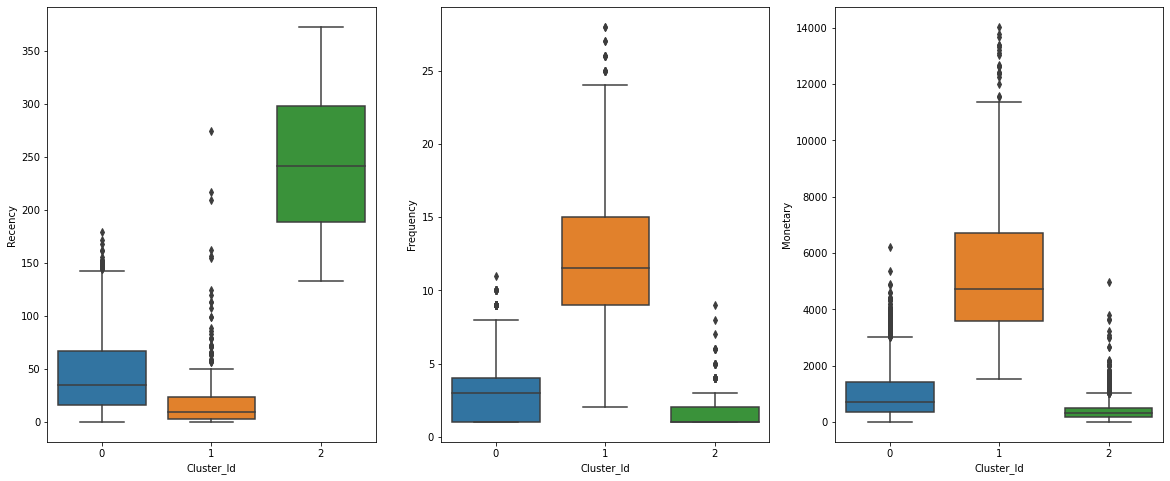

In [72]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.boxplot(x = "Cluster_Id", y = "Recency", data = rfm_df)
plt.subplot(1,3,2)
sns.boxplot(x = "Cluster_Id", y = "Frequency", data = rfm_df)
plt.subplot(1,3,3)
sns.boxplot(x = "Cluster_Id", y = "Monetary", data = rfm_df)
plt.show()

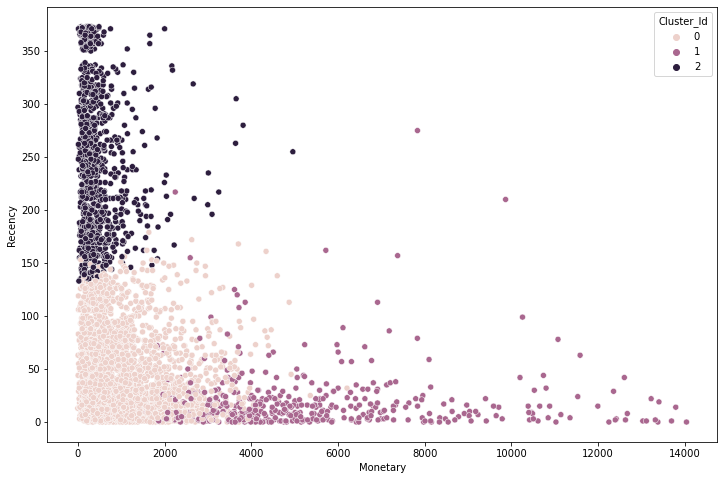

In [74]:
plt.figure(figsize=(12,8))
sns.scatterplot(x= "Monetary", y= "Recency" , data = rfm_df , hue = rfm_df["Cluster_Id"])
plt.show()

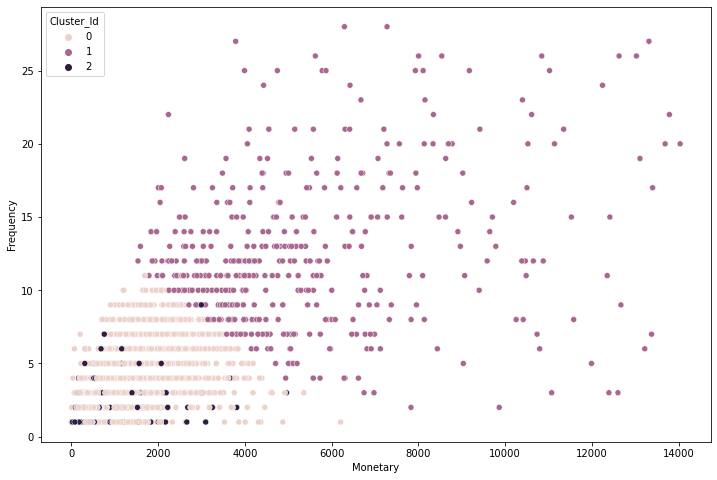

In [76]:
plt.figure(figsize=(12,8))
sns.scatterplot(x= "Monetary", y= "Frequency" , data = rfm_df , hue = rfm_df["Cluster_Id"])
plt.show()

Problem Statement It is a critical requirement for business to understand the value derived from a customer. RFM is a method used for analyzing customer value. Customer segmentation is the practice of segregating the customer base into groups of individuals based on some common characteristics such as age, gender, interests, and spending habits Perform customer segmentation using RFM analysis. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) to least valuable (lowest recency, frequency, and value) Steps Performed Data Cleaning

Check for missing data and formulate an apt strategy to treat them Remove duplicate data records. Perform descriptive analytics on the given data Data Transformation Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts (Customer Monthly Retention )

Create month cohorts and analyze active customers for each cohort Analyze the retention rate of customers Data Modelling

Build a RFM (Recency Frequency Monetary) model. Recency means the number of days since a customer made the last purchase. Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. Monetary is the total amount of money a customer spent in that given period. Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP. Calculate RFM metrics. Build RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles Combine three ratings to get a RFM segment (as strings). Get the RFM score by adding up the three ratings Analyze the RFM segments by summarizing them and comment on the findings Data Modelling Create clusters using k-means clustering algorithm

Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data. Decide the optimum number of clusters to be formed. Analyze these clusters and comment on the results.